In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import datetime
import os
import gmaps
import json
import scipy.stats as st
from scipy.stats import linregress
from collections import OrderedDict

locations_df = os.path.join("Resources", "speed-camera-locations.csv")
locations_df = pd.read_csv(locations_df)
violations_df = os.path.join("Resources", "speed-camera-violations.csv")
violations_df = pd.read_csv(violations_df)
tickets_df = os.path.join("Resources", "tickets_df.csv")
wards_df = os.path.join("Resources", "Ward_Offices.csv")
wards_df = pd.read_csv(wards_df)

In [40]:
locations_df = pd.DataFrame(locations_df)
locations_df = locations_df.dropna(how ="any")
violations_df = pd.DataFrame(violations_df)
violations_df = violations_df.dropna(how ="any")
wards_df = pd.DataFrame(wards_df)
wards_df = wards_df.dropna(how = "any")

In [41]:
#ProPublica dataset '03-'17
tickets_df = pd.read_csv(tickets_df)
keep_col = ['issue_date','violation_location', 'zipcode', 'violation_description', 'total_payments', 'year']
tickets_df = tickets_df[keep_col]
tickets_df.to_csv("newFile.csv", index=False)
tickets_df = tickets_df.dropna(how = "any")
tickets_df

/Users/ericnietzer/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,issue_date,violation_location,zipcode,violation_description,total_payments,year
0,2003-11-01 01:04:00,5500 S WESTERN AVE S,60629,RED LIGHT VIOLATION,90.0,2003
1,2003-11-01 01:35:00,2400 W 55TH STREET E,60632,RED LIGHT VIOLATION,190.0,2003
2,2003-11-01 02:41:00,2400 W 55TH STREET E,62901,RED LIGHT VIOLATION,180.0,2003
3,2003-11-01 05:04:00,2400 W 55TH STREET E,60638,RED LIGHT VIOLATION,90.0,2003
4,2003-11-01 06:40:00,2400 W 55TH STREET E,60632,RED LIGHT VIOLATION,90.0,2003
...,...,...,...,...,...,...
11557492,2016-12-31 23:55:00,4700 S KEDZIE AVE,605011172,RED LIGHT VIOLATION,100.0,2016
11557493,2016-12-31 23:56:00,2800 N CICERO AVENUE,60160,RED LIGHT VIOLATION,100.0,2016
11557494,2016-12-31 23:56:00,2000 W DIVISION,605613913,RED LIGHT VIOLATION,100.0,2016
11557495,2016-12-31 23:57:00,3600 N WESTERN AVENUE,601874971,RED LIGHT VIOLATION,100.0,2016


In [42]:
clean_tickets_df = tickets_df.rename(columns={"issue_date":"ISSUED", "violation_location":"ADDRESS", "violation_description":"VIOLATION", "total_payments":"COST"})
clean_tickets_df.head()

,ISSUED,ADDRESS,zipcode,VIOLATION,COST,year
0,2003-11-01 01:04:00,5500 S WESTERN AVE S,60629,RED LIGHT VIOLATION,90.0,2003
1,2003-11-01 01:35:00,2400 W 55TH STREET E,60632,RED LIGHT VIOLATION,190.0,2003
2,2003-11-01 02:41:00,2400 W 55TH STREET E,62901,RED LIGHT VIOLATION,180.0,2003
3,2003-11-01 05:04:00,2400 W 55TH STREET E,60638,RED LIGHT VIOLATION,90.0,2003
4,2003-11-01 06:40:00,2400 W 55TH STREET E,60632,RED LIGHT VIOLATION,90.0,2003


In [117]:
df = clean_tickets_df[['ADDRESS', 'zipcode','VIOLATION','COST', 'year']]
df.head()

,ADDRESS,zipcode,VIOLATION,COST,year
0,5500 S WESTERN AVE S,60629,RED LIGHT VIOLATION,90.0,2003
1,2400 W 55TH STREET E,60632,RED LIGHT VIOLATION,190.0,2003
2,2400 W 55TH STREET E,62901,RED LIGHT VIOLATION,180.0,2003
3,2400 W 55TH STREET E,60638,RED LIGHT VIOLATION,90.0,2003
4,2400 W 55TH STREET E,60632,RED LIGHT VIOLATION,90.0,2003


In [118]:
clean_tickets_df['VIOLATION'].fillna('N/A', inplace=True)
clean_tickets_df.dropna(inplace=True)
clean_tickets_df

,ISSUED,ADDRESS,zipcode,VIOLATION,COST,year
0,2003-11-01 01:04:00,5500 S WESTERN AVE S,60629,RED LIGHT VIOLATION,90.0,2003
1,2003-11-01 01:35:00,2400 W 55TH STREET E,60632,RED LIGHT VIOLATION,190.0,2003
2,2003-11-01 02:41:00,2400 W 55TH STREET E,62901,RED LIGHT VIOLATION,180.0,2003
3,2003-11-01 05:04:00,2400 W 55TH STREET E,60638,RED LIGHT VIOLATION,90.0,2003
4,2003-11-01 06:40:00,2400 W 55TH STREET E,60632,RED LIGHT VIOLATION,90.0,2003
...,...,...,...,...,...,...
11557492,2016-12-31 23:55:00,4700 S KEDZIE AVE,605011172,RED LIGHT VIOLATION,100.0,2016
11557493,2016-12-31 23:56:00,2800 N CICERO AVENUE,60160,RED LIGHT VIOLATION,100.0,2016
11557494,2016-12-31 23:56:00,2000 W DIVISION,605613913,RED LIGHT VIOLATION,100.0,2016
11557495,2016-12-31 23:57:00,3600 N WESTERN AVENUE,601874971,RED LIGHT VIOLATION,100.0,2016


In [119]:
clean_tickets_df.columns

Index(['ISSUED', 'ADDRESS', 'zipcode', 'VIOLATION', 'COST', 'year'], dtype='object')

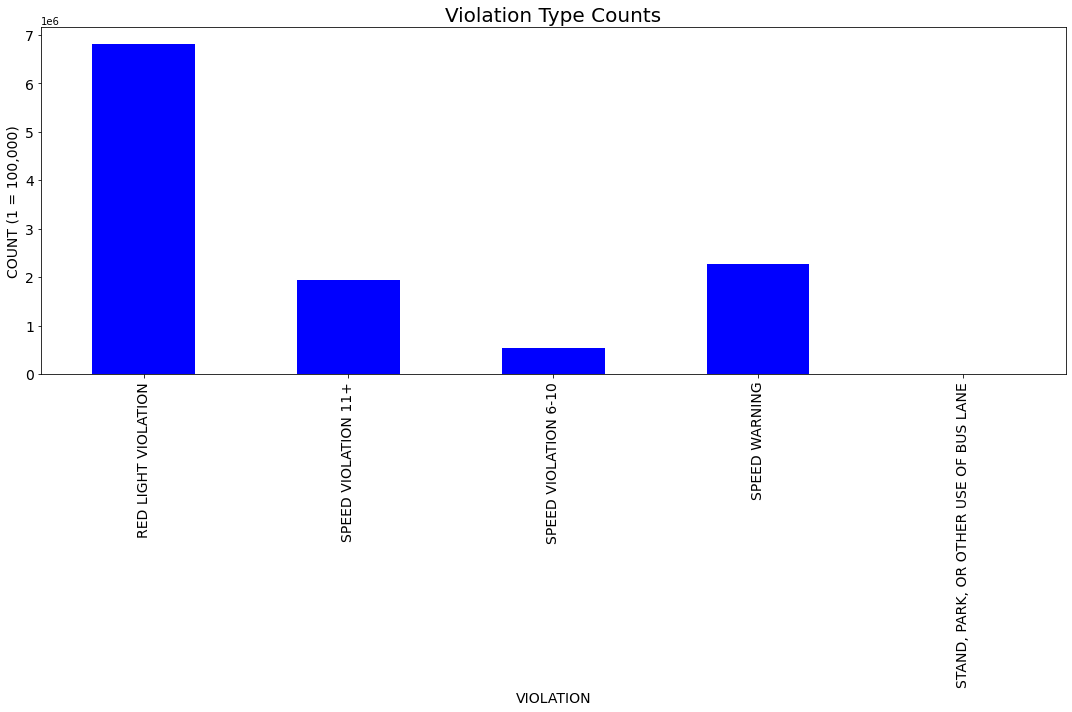

VIOLATION
RED LIGHT VIOLATION                      6810733
SPEED VIOLATION 11+                      1931500
SPEED VIOLATION 6-10                      535057
SPEED WARNING                            2277887
STAND, PARK, OR OTHER USE OF BUS LANE          1
Name: COST, dtype: int64

In [120]:
#Bar graph showing the amount of each type of camera violation
cost_per_violation = clean_tickets_df.groupby(["VIOLATION"])["COST"].count()

plot_pandas = cost_per_violation.plot.bar(figsize=(15,10), color ='b',fontsize=14)
cost_per_violation
plt.xlabel("VIOLATION",fontsize = 14)
plt.ylabel("COUNT (1 = 100,000)",fontsize = 14)
plt.title("Violation Type Counts",fontsize = 20)
plt.savefig("Images/violations_per_count.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

cost_per_violation

In [144]:
tickets_list = (clean_tickets_df.groupby(["VIOLATION"])['COST'].count()).tolist()
tickets_list

[6810733, 1931500, 535057, 2277887, 1]

In [121]:
clean_tickets_df['year'] = pd.to_numeric(clean_tickets_df['year'])

In [122]:
#Amount of tickets issued per year
clean_tickets_df['year'].value_counts()

2014    1724183
2016    1639859
2015    1584040
2017    1424878
2009     719932
2010     711692
2013     683455
2011     614610
2012     610165
2008     546115
2018     413799
2007     331642
2006     273044
2005     167797
2004     107395
2003       2572
Name: year, dtype: int64

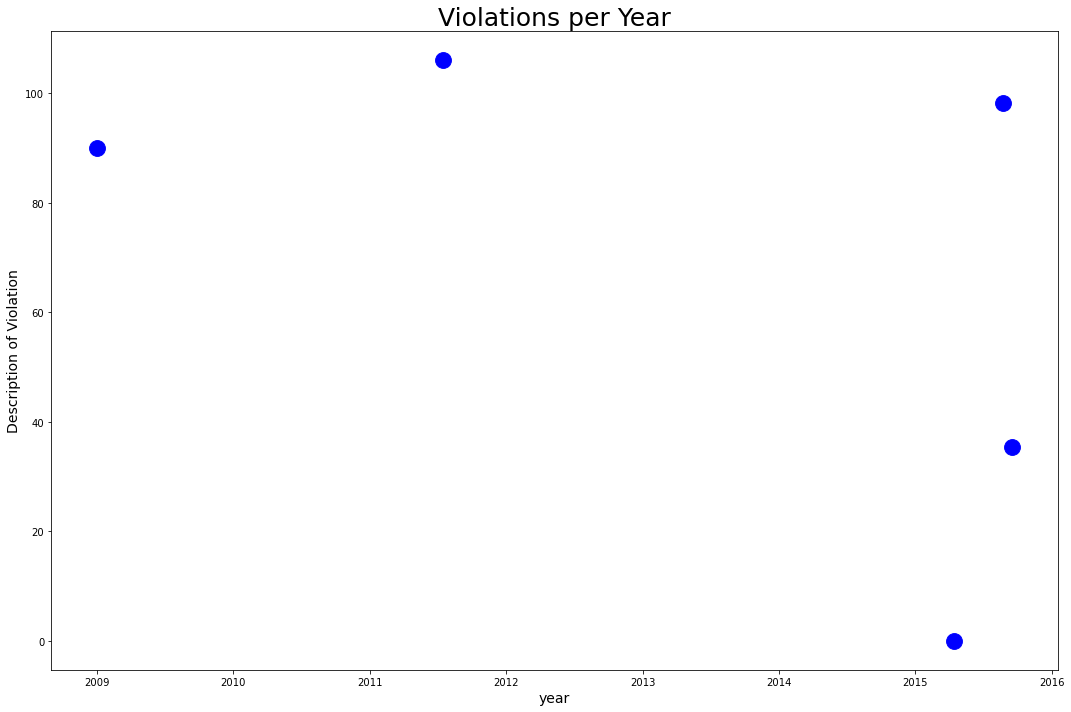

In [141]:
mpl.rcParams['agg.path.chunksize'] = 100000
fig1, ax1 = plt.subplots(figsize=(15, 10))
avg_annual = clean_tickets_df.groupby(["VIOLATION"]).mean()

marker_size=15
plt.scatter(avg_annual['year'], avg_annual['COST'], s=250, color="blue")
plt.title('Violations per Year',fontsize = 25)
plt.xlabel('year',fontsize=14)
plt.ylabel('Description of Violation',fontsize=14)
plt.savefig("Images/violations_per_year.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()       

In [33]:
clean_tickets_df['COST'].value_counts()

100.00    4659349
0.00      4024410
200.00     778022
244.00     632903
90.00      514018
           ...   
504.00          1
173.33          1
173.42          1
4.48            1
38.70           1
Name: COST, Length: 26287, dtype: int64

In [153]:
clean_tickets_df['VIOLATION'].value_counts()

RED LIGHT VIOLATION                      6810733
SPEED WARNING                            2277887
SPEED VIOLATION 11+                      1931500
SPEED VIOLATION 6-10                      535057
STAND, PARK, OR OTHER USE OF BUS LANE          1
Name: VIOLATION, dtype: int64

In [154]:
vio_cost = clean_tickets_df.groupby("VIOLATION")["COST"].count()
COST = [100.00, 244.00, 200.00, 0.00, 90.00]

In [155]:
tic_cost = pd.DataFrame({
        "Fine" : COST,
    "Violation Count": vio_cost
})
tic_cost.head()

,Fine,Violation Count
VIOLATION,,
RED LIGHT VIOLATION,100.0,6810733
SPEED VIOLATION 11+,244.0,1931500
SPEED VIOLATION 6-10,200.0,535057
SPEED WARNING,0.0,2277887
"STAND, PARK, OR OTHER USE OF BUS LANE",90.0,1


Text(0, 0.5, 'Fine Cost')

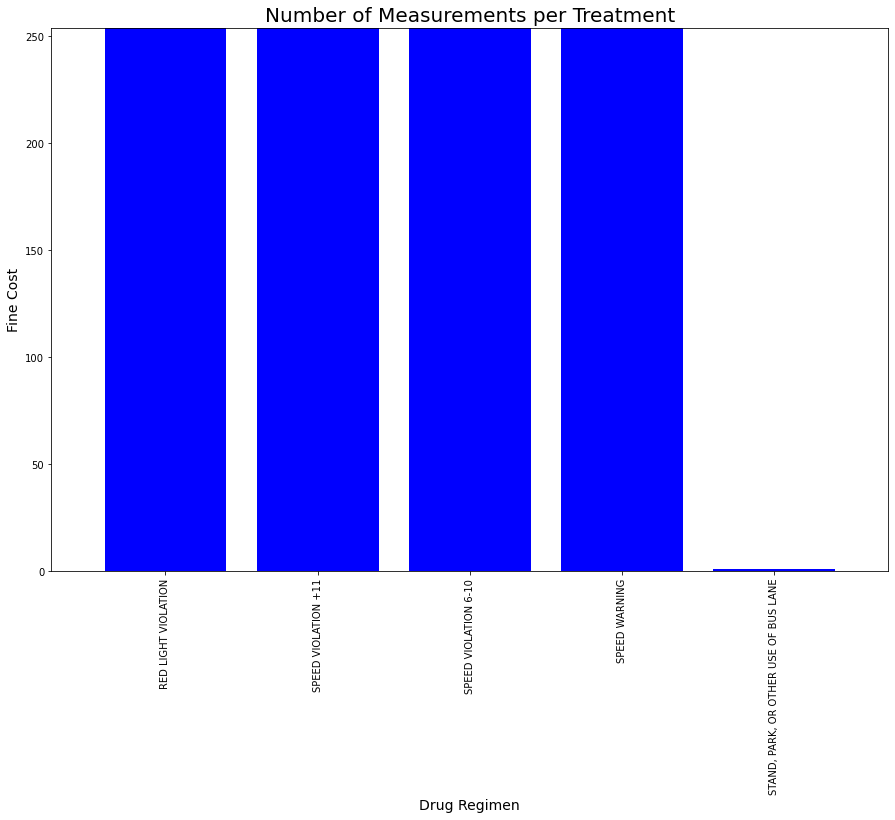

In [194]:
 # Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_axis = forline_df["Timepoint"]
tumsize = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatment of mouse b742',fontsize = 25)
plt.plot(x_axis, tumsize, linewidth=2, markersize=15, marker="o", color="blue", label="Fahrenheit")
plt.xlabel('Timepoint (Days)',fontsize=14)
plt.ylabel('Tumor Volume (mm3)',fontsize=14)
plt.savefig("../Images/line_graph.png",bbox_inches = "tight")
plt.show()    


In [104]:
def to_linear_regress(x, y, weight, arrangement, cmap):
    pearson_r = round(st.pearsonr(x, y)[0],2)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept, 2)}"
    plt.scatter(x, y, s=weight, c=arrangement, cmap=cmap)
    plt.plot(x,regress_values,"r-")
    print(f"correlation coefficient : {pearson_r}")
    print(f"pvalue: {round(pvalue,5)}")
    return line_eq

In [105]:
def to_annotate(line_eq, x, y):
    plt.annotate(line_eq,(x,y),fontsize=13,color="red")

correlation coefficient : -0.12
pvalue: 0.85143


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

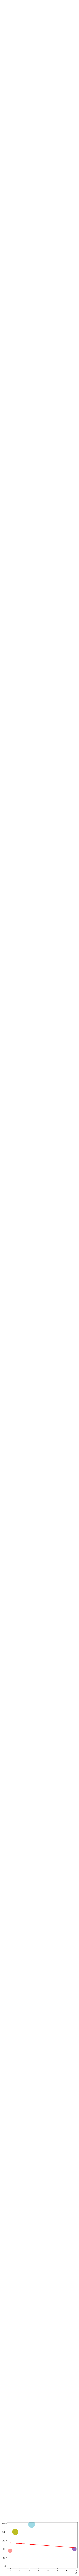

In [113]:
weight= tic_cost["Fine"]*4
labels= tic_cost["Violation Count"] 
arrangement = tic_cost["Fine"]
np.arange(len(tic_cost["Fine"]))
cmap='tab20' 
line = to_linear_regress(tic_cost["Violation Count"], tic_cost["Fine"], weight, arrangement, cmap)
to_annotate(line, 5, 15000)
plt.xticks(np.arange(1, labels, 10))
plt.xlabel("VIOLATION COUNT", fontweight="bold")
plt.ylabel("FINE COST", labelpad=2.0, fontweight="bold") 
plt.title("Violation Type, Cost, and Violation Count", y=1.08, fontweight="bold")
plt.colorbar(label="Fine Cost", orientation="horizontal") 
plt.rcParams["figure.figsize"] = (10,5)
plt.grid(linewidth=0.3)
plt.savefig("Images/cost_violation.png")
plt.show